<a href="https://colab.research.google.com/github/pkmariya/Python/blob/master/AerofitCaseStudy_Mariya_DSMLJune22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aerofit Case Study**


# **Objective**
## Identify the customer characteristics for each type of treadmill offered by Aerofit, so as to provide a better recommendation to the new customers.

In [2]:
# import required librariies & packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson

In [5]:
# import dataset

dataset_url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"
aero_df = pd.read_csv(dataset_url)

In [ ]:
# Basic info of the dataset
aero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# Description of the dataset
aero_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
# Size of the dataset
aero_df.size

1620

In [ ]:
# Shape of the dataset
aero_df.shape

(180, 9)

#### Shape of the dataset indicates there are 180 records with 9 attributes

In [ ]:
# Column names in the dataset
aero_df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

#### the 9 attributes of the given dataset are - Product, Age, Gender, Education, Marital Status, Usage, Fitness, Income and Miles. These attributes will help to identify the characterisitcs associated with each Product.

In [ ]:
# Data types of all the attributes
aero_df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
# top 5 rows from the dataset
aero_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# bottom 5 rows
aero_df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
# Check for Null values
aero_df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### The above result indicates that, there is no null value for any attribute in the given dataset, which is good. 

In [ ]:
# Count of each products
product_cnt = {'Products Count ' : aero_df['Product'].value_counts()}
product_cnt = pd.DataFrame(product_cnt)
product_cnt

,Products Count
KP281,80
KP481,60
KP781,40


#### This gives the count per product. As we can see, KP281 is sold more and KP781 is sold less amongst three products

In [ ]:
# Customers count by age group
age_group_cnt = {'Age Count': aero_df['Age'].value_counts()}
age_group_cnt = pd.DataFrame(age_group_cnt)
age_group_cnt

,Age Count
25,25
23,18
24,12
26,12
28,9
35,8
33,8
30,7
38,7
21,7


#### The above result indicates that the most popular age group which purchased threadmill is between 23 & 26

In [ ]:
# Customers by Gender
gender_cnt = {'Male Female': aero_df['Gender'].value_counts()}
gender_cnt = pd.DataFrame(gender_cnt)
gender_cnt

,Male Female
Male,104
Female,76


#### From the buyers list the Male community is large in number than Females

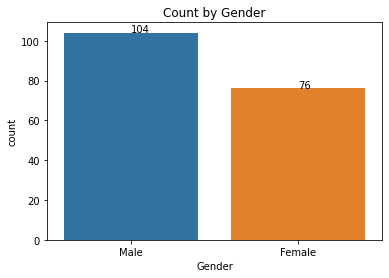

In [ ]:
ax = sns.countplot(data=aero_df, x='Gender')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.40, p.get_height()+0.05))
plt.title("Count by Gender")
plt.show()

In [ ]:
# Customers count by their marital status
marital_status_cnt = aero_df['MaritalStatus'].value_counts()
marital_status_cnt

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

#### Interestingly Partnered seem to have purchased the Threadmill more than the Singles

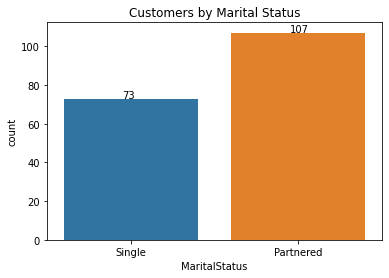

In [ ]:
ax = sns.countplot(data=aero_df, x='MaritalStatus')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
plt.title('Customers by Marital Status')
plt.show()

In [ ]:
mari_status_gender = aero_df.groupby('Gender')['MaritalStatus'].value_counts()
temp_df = pd.DataFrame(mari_status_gender)
mari_status_gender

Gender  MaritalStatus
Female  Partnered        46
        Single           30
Male    Partnered        61
        Single           43
Name: MaritalStatus, dtype: int64

#### About 61% females who are partnered have purchased Threadmills. Similarly amongst partnered males percentage is: 59. Amongst the Singles - Male Vs Female percentages are 41% and 39%. This indicates that purchase of Threadmill is higher amonghs male singles compared to female singles; wherease it becomes reverse amongnst 'partnered' community

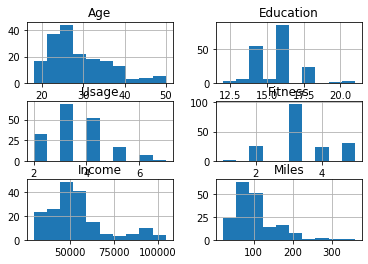

In [ ]:
aero_df.hist()
plt.show()

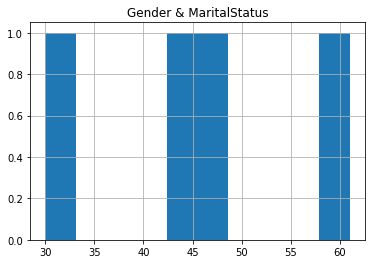

In [ ]:
ax = mari_status_gender.hist()
plt.title("Gender & MaritalStatus")
plt.show()

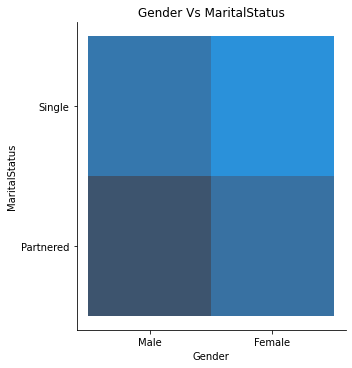

In [28]:
sns.displot(data=aero_df, x='Gender', y='MaritalStatus')
plt.title('Gender Vs MaritalStatus')
plt.show()

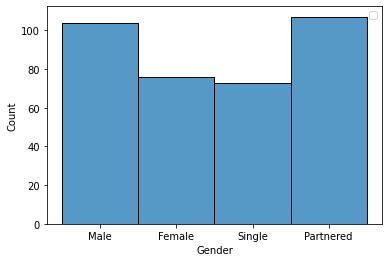

In [ ]:
# ax = sns.countplot(data=aero_df, x=mari_status_gender)
ax = sns.histplot(data=aero_df, x='Gender')
ax = sns.histplot(data=aero_df, x='MaritalStatus')
plt.legend()
plt.show()

In [ ]:
# Usage Count
usage_count = aero_df['Usage'].value_counts()
usage_count

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

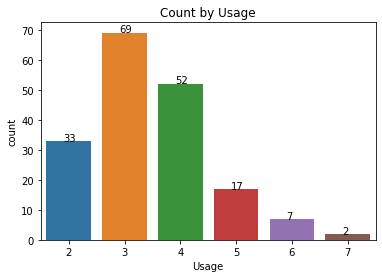

In [ ]:
ax = sns.countplot(data=aero_df, x='Usage')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.30, p.get_height()+0.03))
plt.title('Count by Usage')
plt.show()

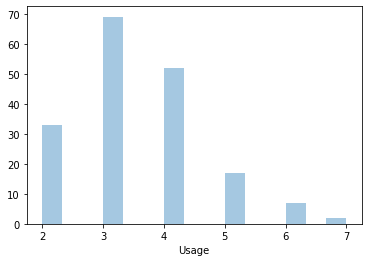

In [44]:
usage_df = aero_df['Usage']
sns.distplot(usage_df, kde=False)

#### Usage Units - Assuming the given Usage numbers are of number of times usage per day, majority of the customers use 3 times. 

In [32]:
# KP281 Product by Usage
KP1_Usage = {'Usage Count': aero_df[aero_df['Product']=='KP281']['Usage'].value_counts()}
KP1_Usage_df = pd.DataFrame(KP1_Usage)
KP1_Usage_df

,Usage Count
3,37
4,22
2,19
5,2


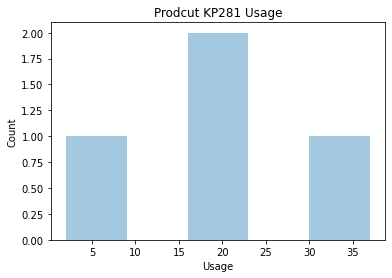

In [43]:
sns.distplot(KP1_Usage_df, bins=5, kde=False)
plt.title("Prodcut KP281 Usage")
plt.xlabel("Usage")
plt.ylabel('Count')

plt.show()

In [ ]:
# KP481 Product by Usage
KP2_Usage = {'Usage Count': aero_df[aero_df['Product']=='KP481']['Usage'].value_counts()}
KP2_Usage_df = pd.DataFrame(KP2_Usage)
KP2_Usage_df

,Usage Count
3,31
2,14
4,12
5,3


In [ ]:
# KP781 Product by Usage
KP3_Usage = {'Usage Count': aero_df[aero_df['Product']=='KP781']['Usage'].value_counts()}
KP3_Usage_df = pd.DataFrame(KP3_Usage)
KP3_Usage_df

,Usage Count
4,18
5,12
6,7
7,2
3,1


#### Interestingly the product KP781 is used 4 or more times a day, but that's the one lowest number sold. The other two products are sold in high numbers but mostly used 3 times a day.

In [ ]:
# Top 10 users of the product KP281 by Age
top10_KP1 = {'Age Count': aero_df[aero_df['Product']=='KP281']['Age'].value_counts()}
top10_KP1_df = pd.DataFrame(top10_KP1)
top10_KP1_df.head(10)

,Age Count
23,8
25,7
26,7
28,6
24,5
38,4
21,4
22,4
29,3
19,3


In [ ]:
# Top 10 users of the product KP481 by Age
top10_KP2 = {'Age Count': aero_df[aero_df['Product']=='KP481']['Age'].value_counts()}
top10_KP2_df = pd.DataFrame(top10_KP2)
top10_KP2_df.head(10)

,Age Count
25,11
23,7
33,5
35,4
31,3
21,3
24,3
26,3
40,3
20,3


In [ ]:
# Top 10 users of the product KP781 by Age
top10_KP3 = {'Age Count': aero_df[aero_df['Product']=='KP781']['Age'].value_counts()}
top10_KP3_df = pd.DataFrame(top10_KP3)
top10_KP3_df.head(10)

,Age Count
25,7
24,4
22,3
27,3
28,3
30,3
23,3
26,2
29,2
40,1


In [ ]:
# Top 10 users of KP281 by gender & by Age
count_by_gender_by_age = aero_df[aero_df['Product']=="KP281"][['Gender', 'Age']].sort_values(by='Gender').value_counts()
count_by_gender_by_age.head(10)

Gender  Age
Male    23     5
        26     4
Female  25     4
        28     4
Male    25     3
Female  22     3
        23     3
        24     3
        26     3
Male    38     3
dtype: int64

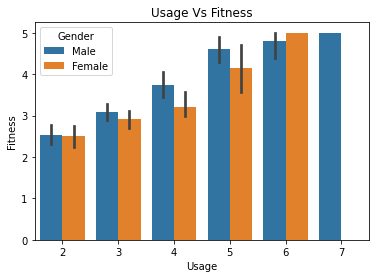

In [ ]:
# Fitness impact due to Usage amongst the Gender
sns.barplot(data=aero_df, x='Usage', y='Fitness', hue='Gender')
plt.title("Usage Vs Fitness")
plt.show()

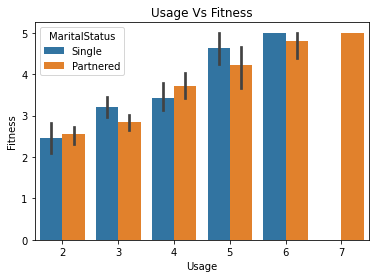

In [ ]:
# Fitness impact due to Usage based on Marital Status
sns.barplot(data=aero_df, x='Usage', y='Fitness', hue='MaritalStatus')
plt.title("Usage Vs Fitness")
plt.show()

In [ ]:
# cust_mask = aero_df['Age']
cust_list = aero_df[aero_df['Product']=='KP281'][['Gender','Miles']].sort_values(by='Miles', ascending=False).head(10)
cust_list



,Gender,Miles
23,Female,188
61,Male,169
8,Male,141
53,Male,141
39,Male,132
72,Male,132
34,Female,113
57,Female,113
31,Male,113
48,Male,113


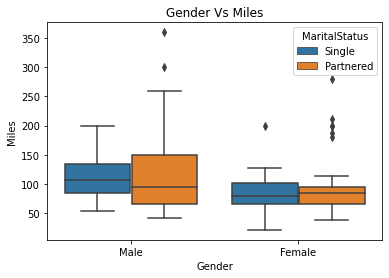

In [ ]:
# Fitness impact due to Usage based on Marital Status
sns.boxplot(data=aero_df, x='Gender', y='Miles', hue='MaritalStatus')
plt.title("Gender Vs Miles")
plt.show()

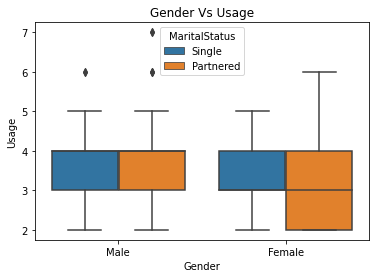

In [ ]:
# Usage based on Marital Status
sns.boxplot(data=aero_df, x='Gender', y='Usage', hue='MaritalStatus')
plt.title("Gender Vs Usage")
plt.show()

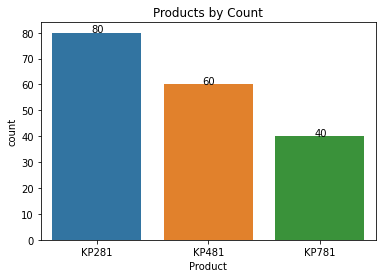

In [ ]:
ax = sns.countplot(data=aero_df, x='Product')
plt.title("Products by Count")
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))

plt.show()

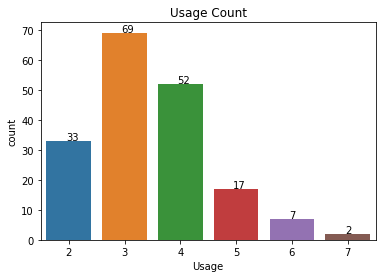

In [ ]:
ax = sns.countplot(data=aero_df, x='Usage')
plt.title("Usage Count")
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))

plt.show()

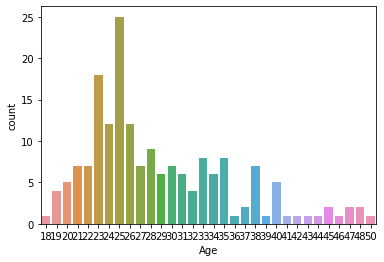

In [ ]:
sns.countplot(data=aero_df, x="Age")
plt.show()

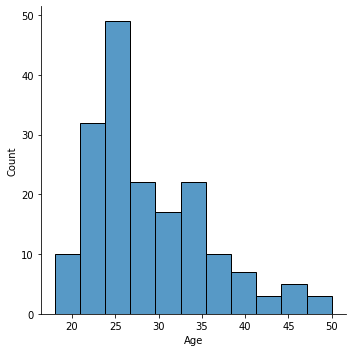

In [ ]:
from pandas.core.ops.dispatch import Any
sns.displot(data=aero_df, x='Age')

plt.show()

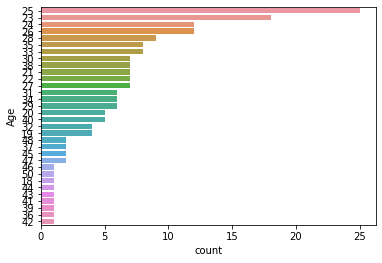

In [ ]:
 sns.countplot(data=aero_df, y="Age", order=aero_df['Age'].value_counts().index[:]) 
 plt.show()


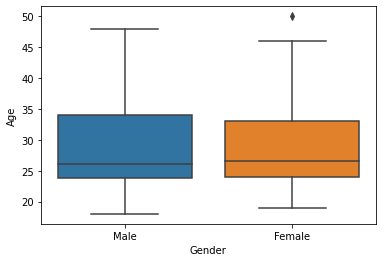

In [ ]:
 sns.boxplot(data=aero_df, x='Gender', y='Age')
 plt.show()

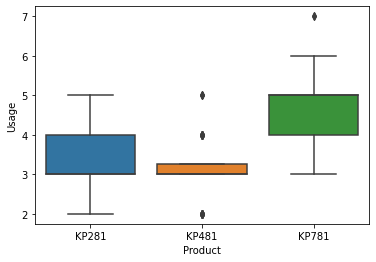

In [ ]:
 sns.boxplot(data=aero_df, x='Product', y='Usage')
 plt.show()

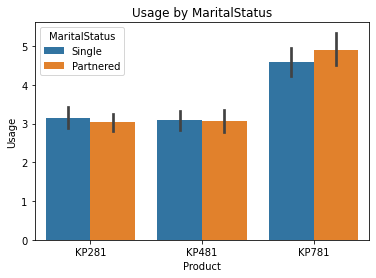

In [ ]:
# Usage based on Marital Status
sns.barplot(data=aero_df, x='Product', y='Usage', hue='MaritalStatus')
plt.title("Usage by MaritalStatus")
plt.show()

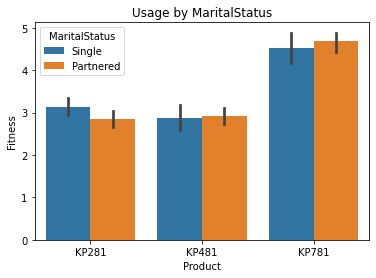

In [ ]:
# Usage based on Marital Status
sns.barplot(data=aero_df, x='Product', y='Fitness', hue='MaritalStatus')
plt.title("Usage by MaritalStatus")
plt.show()

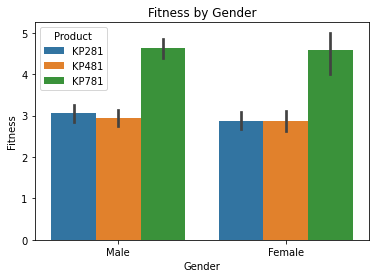

In [ ]:
# Fitness based on Marital Status
sns.barplot(data=aero_df, x='Gender', y='Fitness', hue='Product')
plt.title("Fitness by Gender")
plt.show()

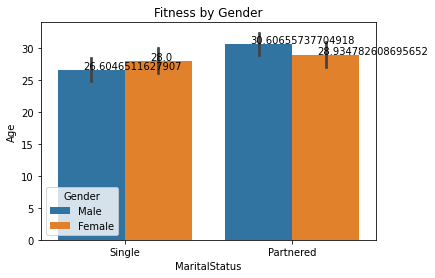

In [26]:
# Count based on Marital Status & Gender
prod_cnt = aero_df['Product'].value_counts()
sns.barplot(data=aero_df, x='MaritalStatus', y='Age', hue='Gender')
plt.title("Fitness by Gender")
plt.show()

#### Male Singles seem to be younger compared Female Singles from those who purchased Threadmills. On the otherhand Partnered Males are of elder as compared to Partnered Females. This indicates Young females purchase threadmills more and male community buy them after they become partnered.